In [1]:
from roboflow import Roboflow
from configparser import ConfigParser 
from PIL import Image
conf = ConfigParser()
conf.read("/home/james/api_keys.conf")
rf = Roboflow(api_key=conf["ROBOFLOW"]["key"])
project = rf.workspace().project("csv-to-txt-mutvh")
model = project.version(1).model
import numpy as np 
import cv2


loading Roboflow workspace...
loading Roboflow project...


In [2]:

# infer on a local image
results = model.predict("/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png", confidence=40, overlap=30).json()

In [3]:
results

{'predictions': [{'x': 146.5,
   'y': 124.5,
   'width': 35.0,
   'height': 39.0,
   'confidence': 0.8248906135559082,
   'class': 'Tooth',
   'class_id': 1,
   'image_path': '/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 111.5,
   'y': 124.5,
   'width': 31.0,
   'height': 37.0,
   'confidence': 0.8013938665390015,
   'class': 'Tooth',
   'class_id': 1,
   'image_path': '/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 82.0,
   'y': 122.5,
   'width': 24.0,
   'height': 35.0,
   'confidence': 0.756342351436615,
   'class': 'Tooth',
   'class_id': 1,
   'image_path': '/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 178.0,
   'y': 123.5,
   'width': 24.0,
   'height': 37.0,
   'confidence': 0.6704254746437073,
   'class': 'Tooth',
   'class_id': 1,
   'image_path': '/mnt/c/

In [4]:
results["image"]

{'width': '256', 'height': '256'}

In [5]:
import supervision as sv

In [6]:
single_brace = Image.open("./images/single_brace.png")

In [7]:
asp_ratio = single_brace.size[0]/single_brace.size[1]

In [8]:
results["predictions"].sort(key=lambda x: x["x"])

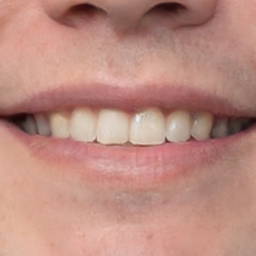

In [9]:
orig_image = Image.open("/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png")
orig_image

In [10]:


#results = model.predict("/mnt/c/Users/james/data/braces_and_teeth/teeth2/train/2001.png", confidence=40, overlap=30).json()

for i in range(0, len(results["predictions"])):
    pred = results["predictions"][i]
    if i > 0: 
        prev = results["predictions"][i-1]
        orig_image = Image.fromarray(
                        cv2.line(np.array(orig_image), 
                            (int(prev["x"]*0.97),int(prev["y"]*1.03)), (int(pred["x"]*0.97),int(pred["y"]*1.03)),
                            (128,128,128),1)
                    )
    brace_w = int(pred["width"]/2)
    brace_h = int(brace_w/asp_ratio)
    orig_image.paste(single_brace.resize((brace_w,brace_h)), (int(pred["x"]*0.97), int(pred["y"]*.99)))

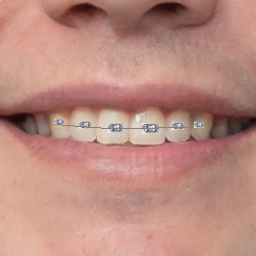

In [11]:
orig_image

In [116]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model.predict(frame, imgsz=1280)[0]
    for i in range(0, len(results["predictions"])):
        pred = results["predictions"][i]
        if i > 0: 
            prev = results["predictions"][i-1]
            orig_image = Image.fromarray(
                            cv2.line(np.array(orig_image), 
                                (int(prev["x"]*0.97),int(prev["y"]*1.03)), (int(pred["x"]*0.97),int(pred["y"]*1.03)),
                                (128,128,128),1)
                        )
        brace_w = int(pred["width"]/2)
        brace_h = int(brace_w/asp_ratio)
        orig_image.paste(single_brace.resize((brace_w,brace_h)), (int(pred["x"]*0.97), int(pred["y"]*.99)))

        
    return frame

In [118]:
video = cv2.VideoCapture(0)

[ WARN:0@6182.403] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@6182.406] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


In [121]:
! ls /dev

autofs		 hvc6	       ptmx   random  tty14  tty31  tty49  tty9
block		 hvc7	       ptp0   rtc0    tty15  tty32  tty5   ttyS0
bsg		 kmsg	       pts    sda     tty16  tty33  tty50  ttyS1
btrfs-control	 kvm	       ram0   sdb     tty17  tty34  tty51  ttyS2
bus		 loop-control  ram1   sdc     tty18  tty35  tty52  ttyS3
console		 loop0	       ram10  sg0     tty19  tty36  tty53  urandom
cpu_dma_latency  loop1	       ram11  sg1     tty2   tty37  tty54  vcs
cuse		 loop2	       ram12  sg2     tty20  tty38  tty55  vcs1
dri		 loop3	       ram13  shm     tty21  tty39  tty56  vcsa
dxg		 loop4	       ram14  stderr  tty22  tty4   tty57  vcsa1
fd		 loop5	       ram15  stdin   tty23  tty40  tty58  vcsu
full		 loop6	       ram2   stdout  tty24  tty41  tty59  vcsu1
fuse		 loop7	       ram3   tty     tty25  tty42  tty6   vfio
hvc0		 mapper        ram4   tty0    tty26  tty43  tty60  vhost-net
hvc1		 mem	       ram5   tty1    tty27  tty44  tty61  vport0p0
hvc2		 net	       ram6   tty10   tty28  tty45  tty62  v